In [2]:
'S2A_MSIL2A_20200105T053221_N9999_R105_T43RGQ_20211115T110155.SAFE'.split('_')[1][3:]

'L2A'

In [3]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)


MinMaxScaler()

In [4]:
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [5]:
scaler = MinMaxScaler().fit(data)
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [7]:
import numpy as np

In [45]:
arr = np.array([[5, np.nan, np.nan, 7, 2],
                [3, np.nan, 1, 8, np.nan],
                [4, 9, 6, np.nan, np.nan]])
mask = np.isnan(arr)
idx = np.where(~mask,np.arange(mask.shape[1]),0)
print(idx)
np.maximum.accumulate(idx,axis=1, out=idx)
print(idx)
out = arr[np.arange(idx.shape[0])[:,None], idx]

[[0 0 0 3 4]
 [0 0 2 3 0]
 [0 1 2 0 0]]
[[0 0 0 3 4]
 [0 0 2 3 3]
 [0 1 2 2 2]]


In [ ]:
arr[mask] = arr[np.nonzero(mask)[0], idx[mask]]

In [33]:
np.nonzero(mask)[0]

array([0, 0, 1, 1, 2, 2], dtype=int64)

In [34]:
idx[mask]

array([0, 0, 0, 3, 2, 2])

In [9]:
arr

array([[ 5., nan, nan,  7.,  2.],
       [ 3., nan,  1.,  8., nan],
       [ 4.,  9.,  6., nan, nan]])

In [10]:
out

array([[5., 5., 5., 7., 2.],
       [3., 3., 1., 8., 8.],
       [4., 9., 6., 6., 6.]])

In [11]:
mask

array([[False,  True,  True, False, False],
       [False,  True, False, False,  True],
       [False, False, False,  True,  True]])

In [12]:
idx

array([[0, 0, 0, 3, 4],
       [0, 0, 2, 3, 3],
       [0, 1, 2, 2, 2]])

In [13]:
from scipy import interpolate

In [38]:
x = np.arange(0, 12)
y = np.array([1,1.14, 1.3, 3, 0, 6, 7, 7, 6.5, 6, 0, 1])
mask = y == 0
f = interpolate.interp1d(x[~mask], y[~mask], fill_value='extrapolate')
x_new = x[mask]
y_new = f(x_new)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
x_new

array([ 4, 10])

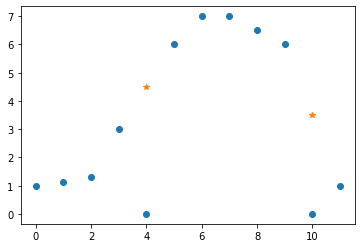

In [31]:
plt.plot(x, y, 'o')
plt.plot(x_new, y_new, '*')

In [41]:
[x_new, x_new]

[array([ 4, 10]), array([ 4, 10])]

In [43]:
f([])

array([], dtype=float64)

In [46]:
mask

array([[False,  True,  True, False, False],
       [False,  True, False, False,  True],
       [False, False, False,  True,  True]])

(array([0, 1, 2], dtype=int64),)

In [56]:
mask = np.array([[False,  False,  True, False, False],
       [False,  True, False, False,  True],
       [False, False, False,  True,  True],
       [False, False, False,  False,  False]])

In [59]:
np.nonzero(mask.sum(axis=1))[0]

array([0, 1, 2], dtype=int64)

In [63]:
y

array([1.  , 1.14, 1.3 , 3.  , 0.  , 6.  , 7.  , 7.  , 6.5 , 6.  , 0.  ,
       1.  ])

In [66]:
np.nonzero(y)

(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 11], dtype=int64),)

In [70]:
np.argwhere(y == 0)

array([[ 4],
       [10]], dtype=int64)

In [73]:
mask[1,:]

array([False,  True, False, False,  True])

In [77]:
a = np.arange(20).reshape(2,2,5)

In [78]:
shape = a.shape
shape

(2, 2, 5)

In [79]:
a.reshape(-1, shape[-1])

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [80]:
a.reshape(-1, shape[-1]).reshape(shape)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

In [82]:
a[:,:,1].max(axis=1)

array([ 6, 16])

In [87]:
import os

import fiona
import pickle
import shapely
import numpy as np
import pandas as pd
import geopandas as gpd
import skimage
import rasterio
from rasterio.windows import Window

In [95]:
def prepare_meta_window(geotiff_dir, label_path):
    img_path = geotiff_dir + os.listdir(geotiff_dir)[0]
    img = rasterio.open(img_path)
    transform, dst_crs = img.transform, img.crs

    label_shp = gpd.read_file(label_path)
    label_shp = label_shp.to_crs(dst_crs)
    window = get_window(transform, label_shp.total_bounds)

    _, meta = load_geotiff(img_path, window, as_float=False)
    return meta, window


def get_window(transform, bounds):
    """

    Parameters
    ----------
    transform
    bounds

    Returns
    -------
    Window(col_off, row_off, width, height)
    """
    minx, miny, maxx, maxy = bounds
    row_min, col_min = rasterio.transform.rowcol(transform, minx, maxy)
    row_max, col_max = rasterio.transform.rowcol(transform, maxx, miny)
    return Window(col_min, row_min, col_max - col_min, row_max - row_min)

def load_geotiff(path, window=None, as_float=True):
    """ Load the geotiff as a list of numpy array.
        INPUT : path (str) -> the path to the geotiff
                window (rasterio.windows.Window) -> the window to use when loading the image
        OUTPUT : band (list of numpy array) -> the different bands unscaled
                 meta (dictionary) -> the metadata associated with the geotiff
    """
    with rasterio.open(path) as f:
        if as_float:
            band = [skimage.img_as_float(f.read(i + 1, window=window)) for i in range(f.count)]
        else:  # normal read
            band = [f.read(i + 1, window=window) for i in range(f.count)]
        meta = f.meta
        if window is not None:
            meta['height'] = window.height
            meta['width'] = window.width
            meta['transform'] = f.window_transform(window)
    return band, meta


In [102]:
feature_dir = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43SFR/raster/'
label_path = '../data/train_labels/train_labels.shp'

In [96]:
meta, window = prepare_meta_window(feature_dir, label_path)

In [99]:
meta, window

({'driver': 'GTiff',
  'dtype': 'uint16',
  'nodata': None,
  'width': 1531,
  'height': 2241,
  'count': 5,
  'crs': CRS.from_epsg(32643),
  'transform': Affine(10.0, 0.0, 693170.0,
         0.0, -10.0, 3568220.0)},
 Window(col_off=9317, row_off=3178, width=1531, height=2241))

In [98]:
%%timeit
load_geotiff('N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/train_region/L2A_T43SFR_A014860_20200110T053549.tiff')

([array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 

In [106]:
%%timeit
load_geotiff(feature_dir + 'L2A_T43SFR_A027558_20201001T053726.tiff', window, as_float=False)

810 ms ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
%%timeit
load_geotiff(feature_dir + 'L2A_T43SFR_A027558_20201001T053726.tiff', window, as_float=True)

910 ms ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
np.arange(10).reshape(2,5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [109]:
np.arange(10).reshape(2,5).mean(axis=0)

array([2.5, 3.5, 4.5, 5.5, 6.5])

In [1]:
import rasterio

In [2]:
raster = rasterio.open('N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43SFR/raster/L2A_T43SFR_A014860_20200110T053549.tiff')

In [3]:
raster.descriptions

('B02', 'B03', 'B04', 'B08', 'cloud mask')

In [4]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 5,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 3600000.0)}

In [8]:
raster.descriptions.index('cloud mask')

4

In [13]:
a = list(raster.descriptions)
a.remove('cloud mask')
a

['B02', 'B03', 'B04', 'B08']

In [16]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [19]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
b = list(range(10))
b.pop(2)
b

[0, 1, 3, 4, 5, 6, 7, 8, 9]

In [25]:
import numpy as np

In [27]:
np.array([0,1,2,3,4])[[0,1]]

array([0, 1])